In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
tqdm.pandas()

In [21]:
# df_name = 'us-mar-apr2022.csv'
df_name = 'can-apr2020-mar2021.csv'
# df_name = 'us-regular-apr2022.csv'
predict_df = pd.read_csv('csv/analysis_' + df_name)
predict_date = predict_df.date
predict_df.date = pd.to_datetime(predict_df.date)
print(f'Number of unique articles being analyzed: {predict_df.article_id.nunique()}')

Number of unique articles being analyzed: 164116


In [22]:
# df = predict_df[['pairs', 'prediction', 'score']]
# df = df.sample(100)
# def view(num):
#     idx = df.iloc[num]
#     print(idx['pairs'])
#     print(idx['prediction'])
#     print(idx['score'])
# view(22)

In [23]:
def change(x):
    if x == 0:
        return -1
    else:
        return 1
predict_df['prediction'] = predict_df.prediction.apply(lambda x: change(x))
# predict_df['weighted_prediction'] = predict_df['prediction'] * predict_df['score']

**Sentiment based on Publisher and Number of articles published**

**Sentiment by Page Number**

In [24]:
page_counts = predict_df.page_num.value_counts()[:50]
page_nums = page_counts.index
sum_pages = predict_df.groupby('page_num')['prediction'].sum().loc[page_nums]
page_num_df = pd.concat((page_counts,sum_pages),axis=1).reset_index(level=0)
page_num_df.rename({'index':'page', 'prediction':'page_prediction', 'page_num': 'total_page'}, axis=1, inplace=True)

**Sentiment by publisher**

In [25]:
publisher_counts = predict_df.publisher.value_counts()[:50]
publisher_name = publisher_counts.index
sum_publisher = predict_df.groupby('publisher')['prediction'].sum().loc[publisher_name]
publisher_df = pd.concat((publisher_counts,sum_publisher),axis=1).reset_index(level=0)
publisher_df.rename({'index':'publisher_name', 'publisher': 'total_published', 'prediction':'publisher_prediction'}, axis=1, inplace=True)

In [26]:
publisher_page_df = pd.concat((publisher_df, page_num_df),axis=1)
publisher_page_df.to_csv('email_analysis/publisher_page_' + df_name)

**Number of publications per day**

In [27]:
num_articles_per_day = predict_df.groupby('date').nunique()['article_id'].reset_index(level=0)
num_articles_per_day = num_articles_per_day.rename({'article_id':'articles_per_day'},axis=1)

In [28]:
# predict_df = predict_df[predict_df.score > 0.70]

In [29]:
predict_df.prediction.mean()

-0.20551549658369786

In [16]:
# predict_df = predict_df.groupby('date', as_index=False).mean()[['prediction', 'weighted_prediction']]
# print(f'Number of unique articles being analyzed: {predict_df.article_id.nunique()}')

In [30]:
def pre_explode_merge(df_name):
    pre_explode = pd.read_csv('csv/pre_explode_' + df_name)
    pre_explode.date = pd.to_datetime(pre_explode.date)    
    pre_explode = pre_explode[(pre_explode.date >= predict_date.min()) & (pre_explode.date <= predict_date.max())]
    for_comparison = predict_df.article_id.unique()
    print(pre_explode.article_id.nunique())
    pre_explode = pre_explode[pre_explode.article_id.isin(for_comparison)] # Makes sure pre-explode has all the same articles.
    pre_explode = pre_explode.iloc[:, 1:]
    return pre_explode

pre_explode = pre_explode_merge(df_name)
# Make sure this is equal to zero
pre_explode.article_id.nunique() - predict_df.article_id.nunique()

164481


0

In [31]:
df = predict_df.merge(num_articles_per_day, on='date', how='outer')

In [32]:
df.date.max()

Timestamp('2021-03-31 00:00:00')

In [33]:
df = df.groupby('date', as_index=False).mean()[['date','prediction', 'articles_per_day']]

In [34]:
# # ONLY FOR NEWS TITLES
# df = predict_df.groupby('date', as_index=False).mean()
# df = df[['date', 'prediction']]

In [35]:
# df.prediction.rolling(4, center=True).mean().plot()

<AxesSubplot:>

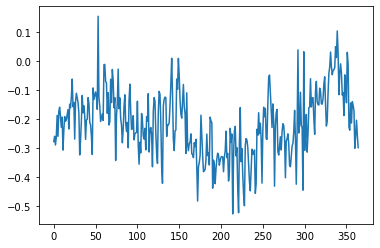

In [36]:
df.prediction.plot()

In [37]:
save_file = 'email_analysis/' + df_name
df.to_csv(save_file)

In [38]:
save_file

'email_analysis/can-apr2020-mar2021.csv'